<a href="https://colab.research.google.com/github/apurvv28/ML-Labs/blob/assignment-6/assignment_6_apurv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 6


Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:


a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis


b. Bivariate analysis: Linear and logistic regression modeling


c. Multiple Regression analysis


d. Also compare the results of the above analysis for the two data sets.


Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


By Apurv Saktepar, Roll No. 11, SEDA Division, PRN - 1252090011

1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

2. Load the dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

Univariate Analysis

In [ ]:
def univariate_analysis(df):
    result = pd.DataFrame({
        "Mean": df.mean(),
        "Median": df.median(),
        "Mode": df.mode().iloc[0],
        "Variance": df.var(),
        "Std Dev": df.std(),
        "Skewness": df.skew(),
        "Kurtosis": df.kurt()
    })
    return result
print(univariate_analysis(df))

                                Mean    Median    Mode      Variance  \
Pregnancies                 3.845052    3.0000   1.000     11.354056   
Glucose                   120.894531  117.0000  99.000   1022.248314   
BloodPressure              69.105469   72.0000  70.000    374.647271   
SkinThickness              20.536458   23.0000   0.000    254.473245   
Insulin                    79.799479   30.5000   0.000  13281.180078   
BMI                        31.992578   32.0000  32.000     62.159984   
DiabetesPedigreeFunction    0.471876    0.3725   0.254      0.109779   
Age                        33.240885   29.0000  22.000    138.303046   
Outcome                     0.348958    0.0000   0.000      0.227483   

                             Std Dev  Skewness  Kurtosis  
Pregnancies                 3.369578  0.901674  0.159220  
Glucose                    31.972618  0.173754  0.640780  
BloodPressure              19.355807 -1.843608  5.180157  
SkinThickness              15.952218  0.109

Univariate Analysis Plot

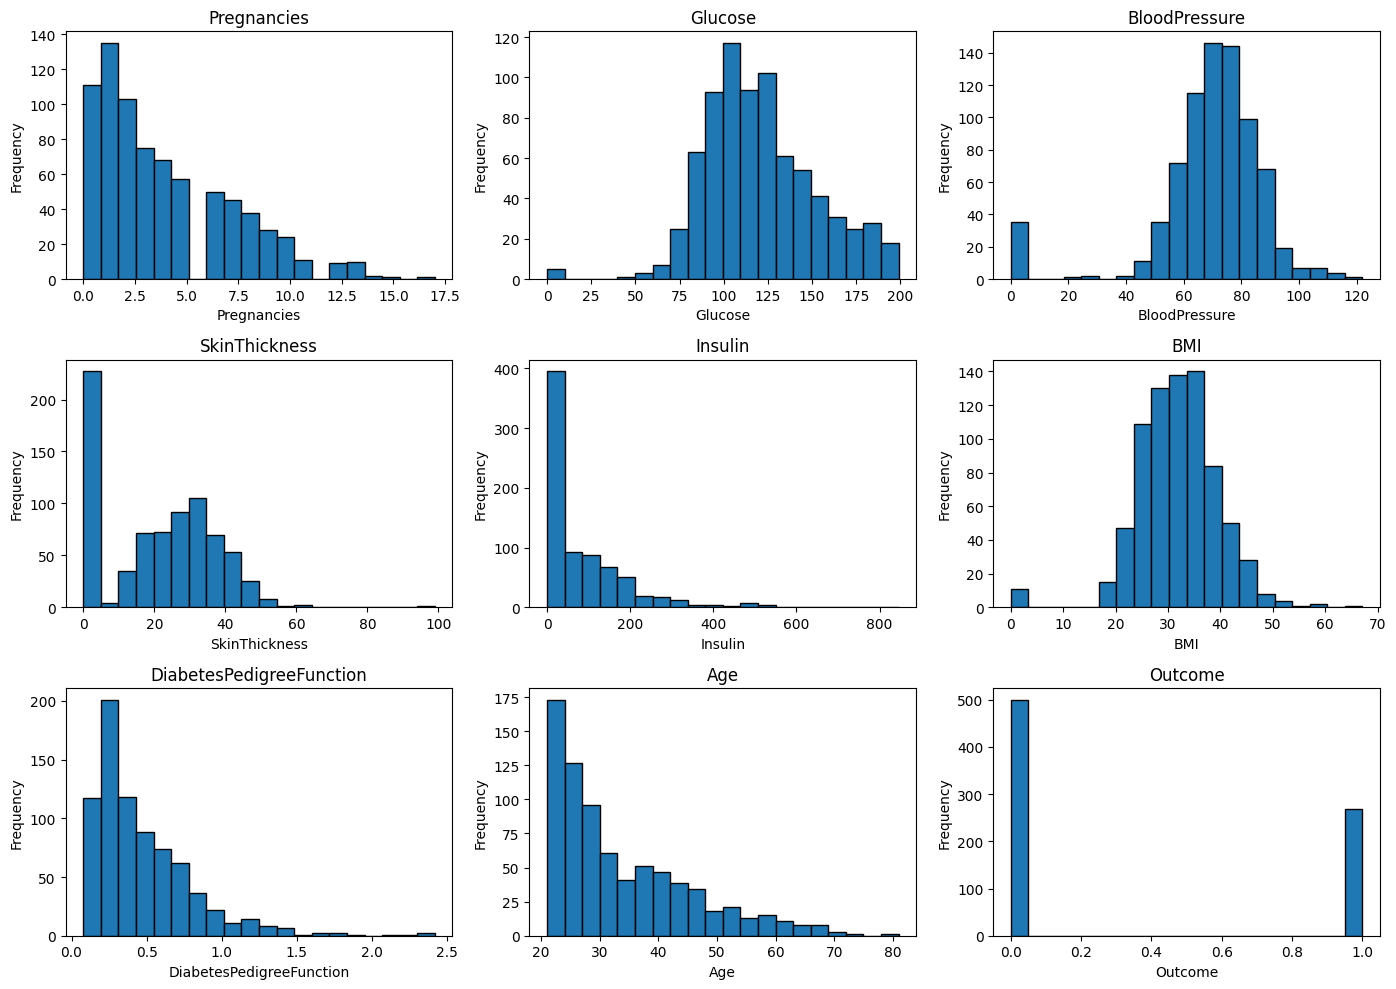

In [ ]:
cols = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

plt.figure(figsize=(14,10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The above histogram shows about how the values of each feature are distributed in the dataset.

Bivariate Analysis of Diabetes Dataset

Logistic Regression

In [ ]:
x=df[['Glucose']]
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
log=LogisticRegression()
log.fit(x_train,y_train)
y1=log.predict(x_test)
acc1=accuracy_score(y1,y_test)
print("Accuracy = ",accuracy_score(y1,y_test))
cm1=confusion_matrix(y1,y_test)
print(confusion_matrix(y1,y_test))

Accuracy =  0.7229437229437229
[[128  41]
 [ 23  39]]


Visualization of Logistics Regression

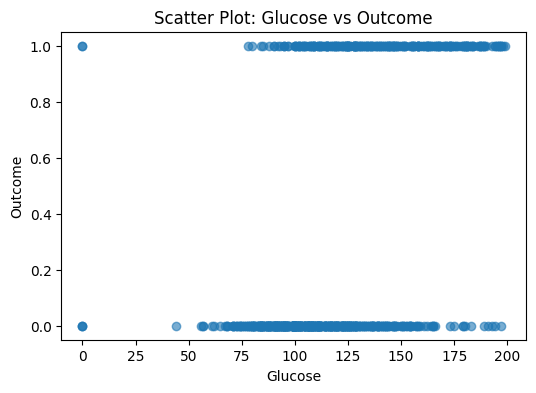

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Scatter Plot: Glucose vs Outcome')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


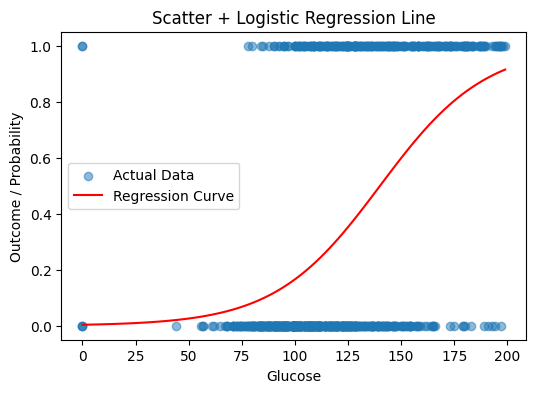

In [ ]:
x_range=np.linspace(x.min(),x.max(),100).reshape(-1,1)
y_prob=log.predict_proba(x_range)[:,1]
plt.figure(figsize=(6,4))
# Scatter (actual data)
plt.scatter(x, y, alpha=0.5, label='Actual Data')
# Line (model prediction)
plt.plot(x_range, y_prob, label='Regression Curve', color='red')
plt.xlabel('Glucose')
plt.ylabel('Outcome / Probability')
plt.title('Scatter + Logistic Regression Line')
plt.legend()
plt.show()

The above plot shows a combined plot of scatter + line graph showing the probability between 0 and 1.
the dots in scatter represent patients whre 0 is non diabetic patients and 1 is diabetic patients.


* At low glucose values, most points are near Outcome = 0


* At high glucose values, more points appear near Outcome = 1


* There is overlap in the middle, which means glucose alone cannot separate the classes perfectly, other features are important too.

The regression curve shows that as gluscose increases, the probability of being diabetic increases smoothly. And as it uses a sigmoid function, it is in S Shape.

Linear Regression

In [ ]:
x1=df[['BMI']]
y1=df['Outcome']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)
lin=LinearRegression()
lin.fit(x1_train,y1_train)
y2=lin.predict(x1_test)
print("Coefficient:", lin.coef_)
print("Intercept:", lin.intercept_)
r2 = r2_score(y1_test, y2)
mse = mean_squared_error(y1_test, y2)
print("R2 Score:", r2_score(y1_test, y2))
print("MSE:", mean_squared_error(y1_test, y2))
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Coefficient: [0.02026962]
Intercept: -0.29804031258062685
R2 Score: 0.03496471024038561
MSE: 0.21846716328959612
RMSE: 0.46740471038447623


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


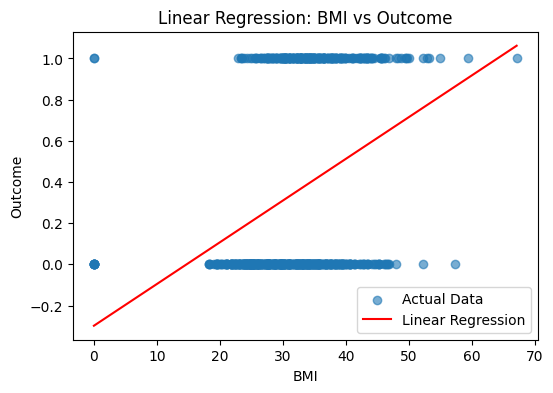

In [ ]:
x1_range = np.linspace(x1.min(), x1.max(), 300).reshape(-1, 1)
y_line = lin.predict(x1_range)
plt.figure(figsize=(6,4))
# Scatter plot (actual data)
plt.scatter(x1, y1, alpha=0.6, label='Actual Data')
# Regression line
plt.plot(x1_range, y_line, label='Linear Regression',color='red')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.legend()
plt.title('Linear Regression: BMI vs Outcome')
plt.show()

The above plot shows combined scatter + line plot where each dot on scatter plot represents patient.


If the plot is on 0, then non diabetic patient but if it is on 1 then it's diabetic patient.


At lower BMI values, most points are closer to Outcome 0, but at higher BMI values most points are closer to outcome 1.


The linear regression line shows a straight-line trend, indicating that as BMI increases, the predicted outcome increases linearly.

Multiple Regression Analysis

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
multi=LogisticRegression(max_iter=2000)
multi.fit(x_train, y_train)
y3=multi.predict(x_test)
acc3=accuracy_score(y3,y_test)
print("Accuracy = ",accuracy_score(y3,y_test))
cm3=confusion_matrix(y3,y_test)
print("Confusion Matrix =\n ",confusion_matrix(y3,y_test))

Accuracy =  0.7359307359307359
Confusion Matrix =
  [[120  30]
 [ 31  50]]


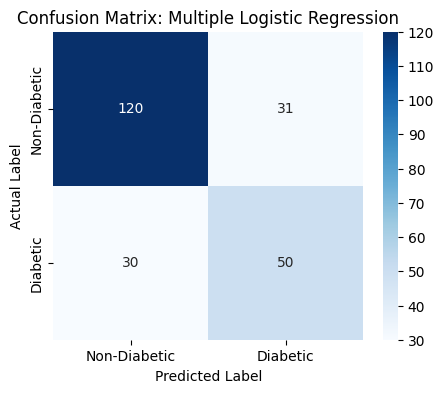

In [ ]:
cm3 = confusion_matrix(y_test, y3)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm3,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Diabetic', 'Diabetic'],
    yticklabels=['Non-Diabetic', 'Diabetic']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Multiple Logistic Regression')
plt.show()

Comparison of above 3 regression models performed

In [ ]:
print("Comparison of above 3 regression models performed")
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Glucose)",
        "Linear Regression (BMI)",
        "Multiple Logistic Regression"
    ],
    "Accuracy": [
        acc1,
        0,
        acc3
    ],
    "R2 Score": [
        0,
        r2,
        0
    ],
    "MSE": [
        0,
        mse,
        0
    ]
})

results

Comparison of above 3 regression models performed


,Model,Accuracy,R2 Score,MSE
0,Logistic Regression (Glucose),0.722944,0.000000,0.000000
1,Linear Regression (BMI),0.000000,0.034965,0.218467
2,Multiple Logistic Regression,0.735931,0.000000,0.000000


Confusion Matrix of models

In [ ]:
print("Confusion Matrix - Logistic Regression:\n", cm1)
print("Confusion Matrix - Multiple Logistic Regression:\n", cm3)

Confusion Matrix - Logistic Regression:
 [[128  41]
 [ 23  39]]
Confusion Matrix - Multiple Logistic Regression:
 [[120  31]
 [ 30  50]]


HeatMaps of confusion matrix's

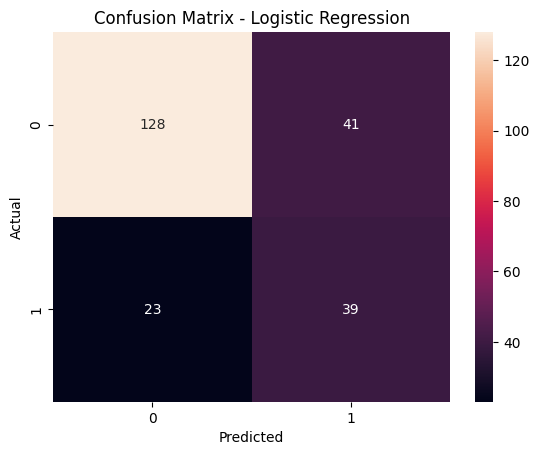

In [ ]:
sns.heatmap(cm1,annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- Implementing Bivariate and Univariate Analysis on SKLearn Dataset

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df1 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df1['target'] = diabetes.target
df1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Univariate Analysis

In [ ]:
print(univariate_analysis(df1))

                Mean      Median       Mode     Variance    Std Dev  Skewness  \
age    -1.444295e-18    0.005383   0.016281     0.002268   0.047619 -0.231382   
sex     2.543215e-18   -0.044642  -0.044642     0.002268   0.047619  0.127385   
bmi    -2.255925e-16   -0.007284  -0.030996     0.002268   0.047619  0.598148   
bp     -4.854086e-17   -0.005670  -0.040099     0.002268   0.047619  0.290658   
s1     -1.428596e-17   -0.004321  -0.037344     0.002268   0.047619  0.378108   
s2      3.898811e-17   -0.003819  -0.001001     0.002268   0.047619  0.436592   
s3     -6.028360e-18   -0.006584  -0.013948     0.002268   0.047619  0.799255   
s4     -1.788100e-17   -0.002592  -0.039493     0.002268   0.047619  0.735374   
s5      9.243486e-17   -0.001947  -0.018114     0.002268   0.047619  0.291754   
s6      1.351770e-17   -0.001078   0.003064     0.002268   0.047619  0.207917   
target  1.521335e+02  140.500000  72.000000  5943.331348  77.093005  0.440563   

        Kurtosis  
age    -

Visualization of Univariate Analysis of SKlearn dataset

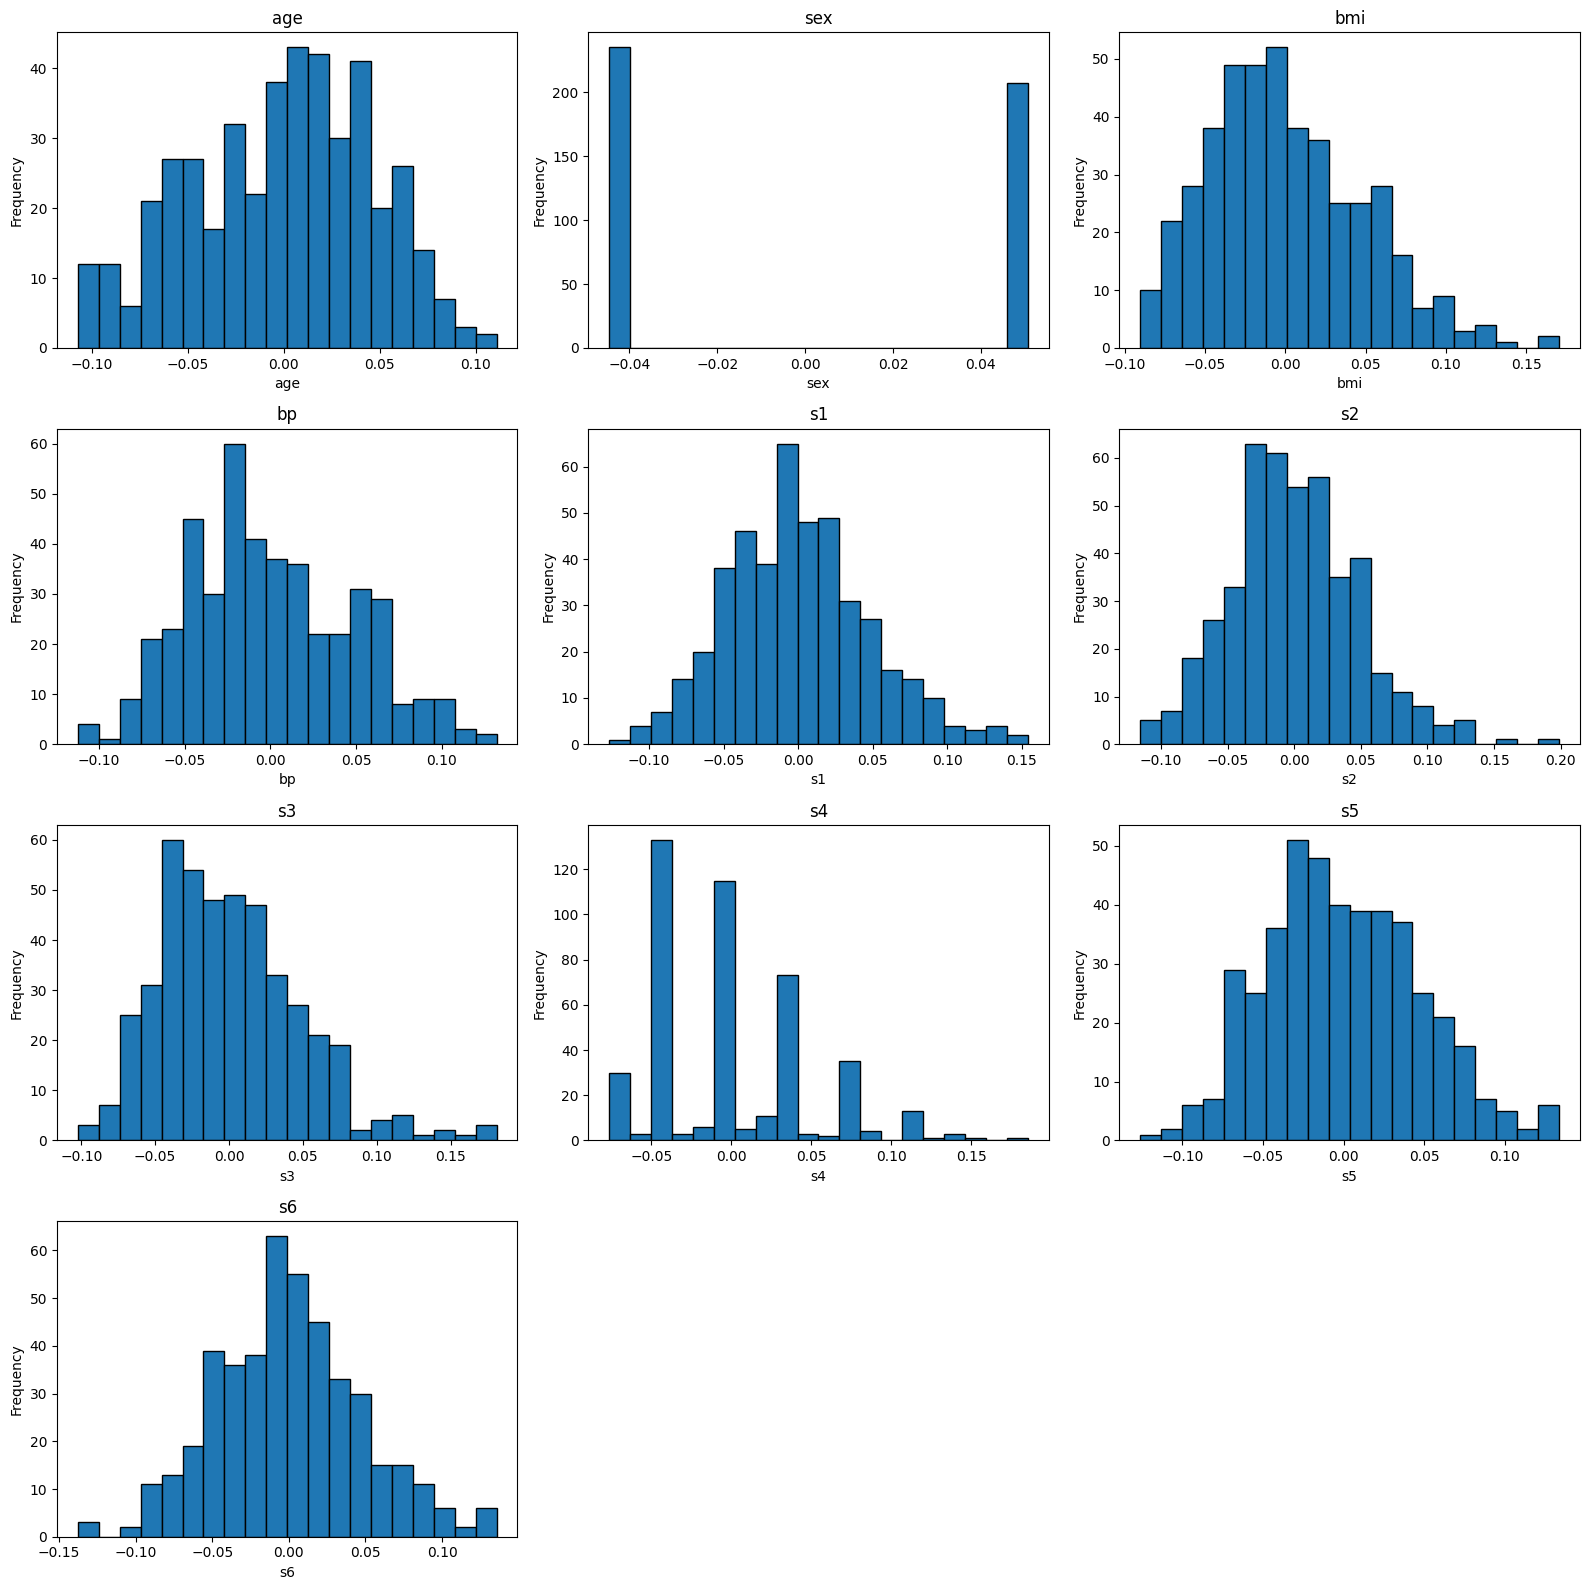

In [ ]:
cols = [
    'age', 'sex', 'bmi', 'bp','s1', 's2', 's3', 's4', 's5', 's6'
]

plt.figure(figsize=(16,16))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    plt.hist(df1[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Analysis


1. Linear Regression

In [ ]:
x1=df1[['bmi']]
y1=df1['target']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)
lin=LinearRegression()
lin.fit(x1_train,y1_train)
y2=lin.predict(x1_test)
print("Coefficient:", lin.coef_)
print("Intercept:", lin.intercept_)
r2 = r2_score(y1_test, y2)
mse = mean_squared_error(y1_test, y2)
print("R2 Score:", r2_score(y1_test, y2))
print("MSE:", mean_squared_error(y1_test, y2))
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Coefficient: [988.41931249]
Intercept: 151.04202449316014
R2 Score: 0.2803417492440603
MSE: 3884.936720961032
RMSE: 62.32926055201547


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


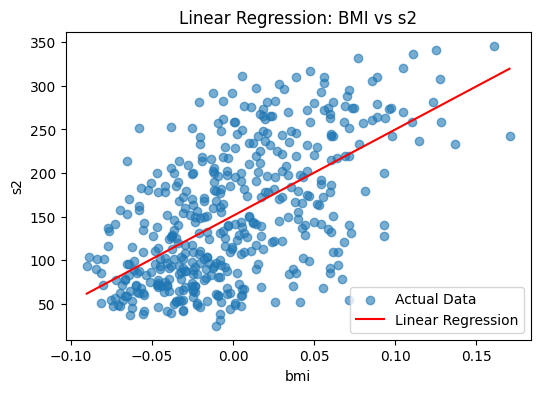

In [ ]:
x1_range = np.linspace(x1.min(), x1.max(), 300).reshape(-1, 1)
y_line = lin.predict(x1_range)
plt.figure(figsize=(6,4))
# Scatter plot (actual data)
plt.scatter(x1, y1, alpha=0.6, label='Actual Data')
# Regression line
plt.plot(x1_range, y_line, label='Linear Regression',color='red')
plt.xlabel('bmi')
plt.ylabel('s2')
plt.legend()
plt.title('Linear Regression: BMI vs s2')
plt.show()

2. Logistic Regression

In [ ]:
m = np.median(diabetes.target)
y_binary = (diabetes.target > m).astype(int)

x = df1[['bp']]
y = y_binary

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
log=LogisticRegression()
log.fit(x_train,y_train)
y1=log.predict(x_test)
acc1=accuracy_score(y1,y_test)
print("Accuracy = ",accuracy_score(y1,y_test))
cm1=confusion_matrix(y1,y_test)
print(confusion_matrix(y1,y_test))

Accuracy =  0.5639097744360902
[[27 13]
 [45 48]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


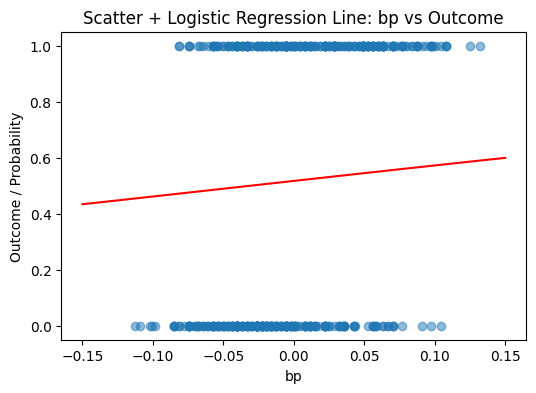

In [ ]:
x_range = np.linspace(-0.15, 0.15, 100).reshape(-1, 1)
y_prob = log.predict_proba(x_range)[:, 1]

plt.figure(figsize=(6,4))
# Scatter (actual data)
plt.scatter(x, y, alpha=0.5, label='Actual Data')
# Line (model prediction)
plt.plot(x_range, y_prob, label='Logistic Regression Curve', color='red')
plt.xlabel('bp')
plt.ylabel('Outcome / Probability')
plt.title('Scatter + Logistic Regression Line: bp vs Outcome')
plt.show()

3. Multiple Regression Analysis

In [ ]:
X = df1.drop('target', axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2821.750981001311
R2 Score: 0.4772897164322617


Coefficients of each feature

In [ ]:
coeff_df = pd.DataFrame(
    model.coef_,
    X.columns,
    columns=['Coefficient']
)

coeff_df

,Coefficient
age,29.254013
sex,-261.706469
bmi,546.299723
bp,388.398341
s1,-901.959668
s2,506.763241
s3,121.154351
s4,288.035267
s5,659.268951
s6,41.376701


Visualization

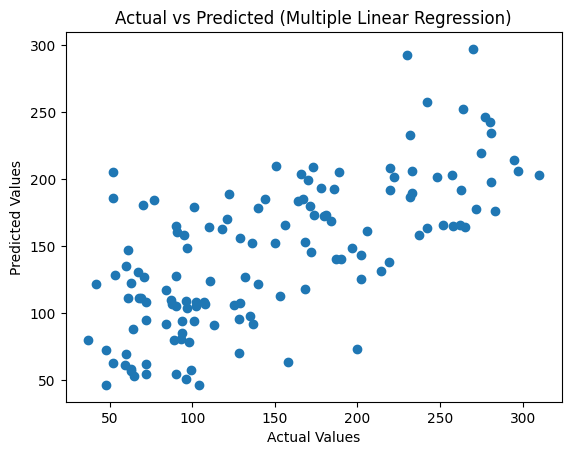

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.show()

Comparison of analysis of 2 datasets

In [ ]:
pima_logistic_acc = 0.7229437229437229
pima_linear_r2 = 0.03496471024038561
pima_linear_mse = 0.21846716328959612
pima_multi_logistic_acc = 0.7359307359307359
result1 = pd.DataFrame({
    "Model": ["Logistic Regression (Glucose)","Linear Regression (BMI)","Multiple Logistic Regression"],
    "Accuracy": [pima_logistic_acc,0,pima_multi_logistic_acc],
    "R2 Score": [0,pima_linear_r2,0],
    "MSE": [0,pima_linear_mse,0]
})
pima_results_df = result1.copy()
result2 = pd.DataFrame({
    "Model": ["SKLearn Linear Regression (bmi)","SKLearn Logistic Regression (bp)","SKLearn Multiple Linear Regression"],
    "Accuracy": [0,acc1,0],
    "R2 Score": [r2,0,r2_score(y_test, y_pred)],
    "MSE": [mse,0,mean_squared_error(y_test, y_pred)]
})
combined_results = pd.concat([pima_results_df, result2], ignore_index=True)
print("Performance Metrics:")
combined_results

Performance Metrics:


,Model,Accuracy,R2 Score,MSE
0,Logistic Regression (Glucose),0.722944,0.000000,0.000000
1,Linear Regression (BMI),0.000000,0.034965,0.218467
2,Multiple Logistic Regression,0.735931,0.000000,0.000000
3,SKLearn Linear Regression (bmi),0.000000,0.280342,3884.936721
4,SKLearn Logistic Regression (bp),0.563910,0.000000,0.000000
5,SKLearn Multiple Linear Regression,0.000000,0.477290,2821.750981


Conclusion - In this assignment, I have implemented Univariate and Bivariate analysis on Pima and SKLearn datasets. While analysis i have implemented linear, logistic and multiple regression on the same dataset.